<a href="https://colab.research.google.com/github/a-forty-two/EY_batch11_3Mar/blob/main/4Mar_001_ExploratoryDataAnalysisAndFeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
filepath = 'https://raw.githubusercontent.com/a-forty-two/EY_batch11_3Mar/refs/heads/main/data.csv'
data = pd.read_csv(filepath, header = 0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [5]:
data = data.iloc[:, :-1]

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# what is our ML algo that we are trying to train?

# diagnosis = w1*id + w2*radius_mean....... w30*frac_dim_worst + c

In [8]:
len(set(data['id'])) # very good candidate to make an index!

569

In [9]:
# we all could easily figure out that ID should NOT have participated in ML
# but there has to be a MATH way to prove/disprove the inclusion!

In [10]:
# CORRELATION -> directly/inversely proportional
# value between (-1 to 1) -> -1 negative corr, 1 pos correlation, 0 indicates-> NO CORR!

# savings = f(salary, inheritence, expenditure, EMIs, my_fav_meal)
# POS -> if sal inc saving inc, inheritence
# NEG -> exp, EMIs
# ZERO -> my_fav_meal

# savings = w1*salary + w2*inherit - w3*exp - w4*emi + c


In [11]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
input_cols = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df = data.loc[:, input_cols]
mycors = df.corr()

In [13]:
mycors

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

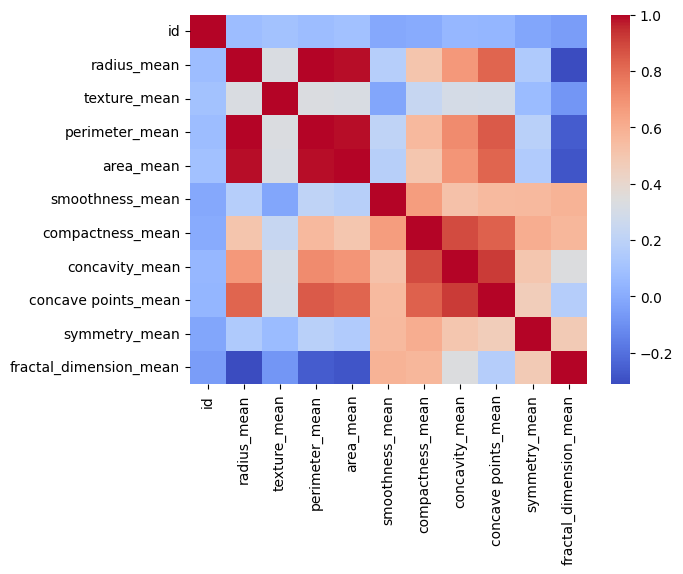

In [14]:
# HEATMAP
import seaborn as sns
sns.heatmap(mycors, cmap='coolwarm')

In [15]:
# AREA, RADIUS, PERIMETER -> all 3 have tending to 1 correlation
# this means we can proceed with 1 of the columns instead of selecting all 3!!!


<Figure size 640x480 with 0 Axes>

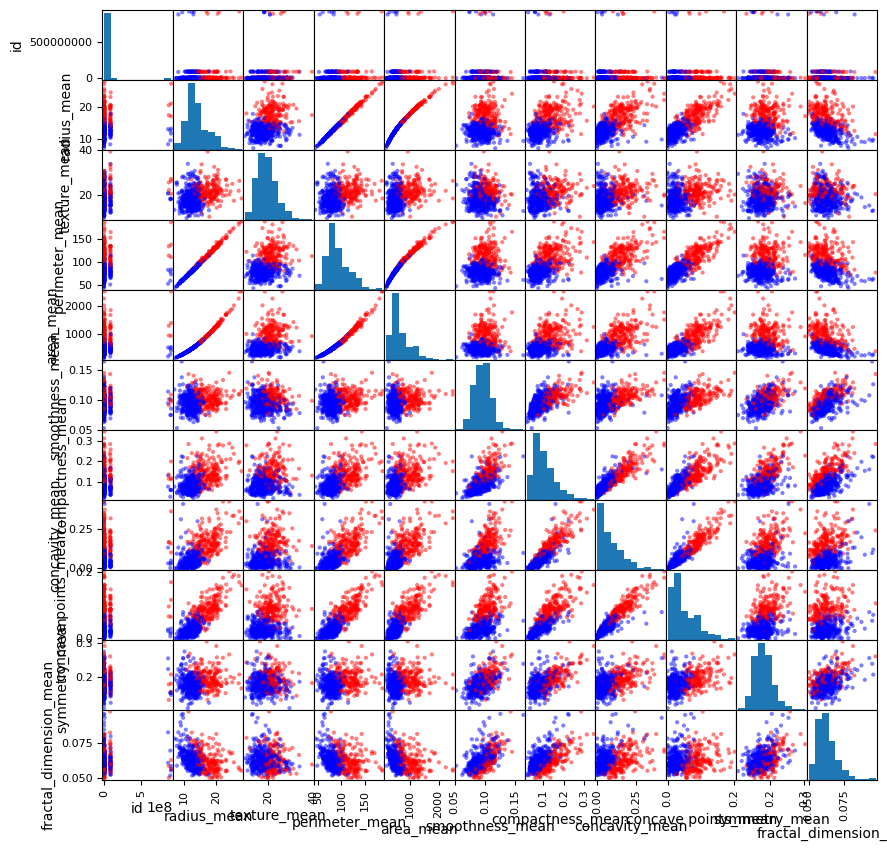

In [16]:
import matplotlib.pyplot as plt
plt.figure() # CLEAN the graph buffer before writing anything into it
diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic)
sm = pd.plotting.scatter_matrix(df, c=diagnosis_encoded, figsize=(10,10))
plt.show() # not required in iPython

In [17]:
data = data.set_index('id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Principal Component Analysis, Linear Discriminant Analysis -> 2 strategies to find
# which are the FEATURES that should be used for ML

# COLUMN -> is in the dataset
# feature -> is what we learn on

# a feature could be a COLUMN itself or derived out of columns!

# Length, breadth -> area = l * b

In [19]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

<ipython-input-20-4e32d3fb6bd0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
<ipython-input-20-4e32d3fb6bd0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blu

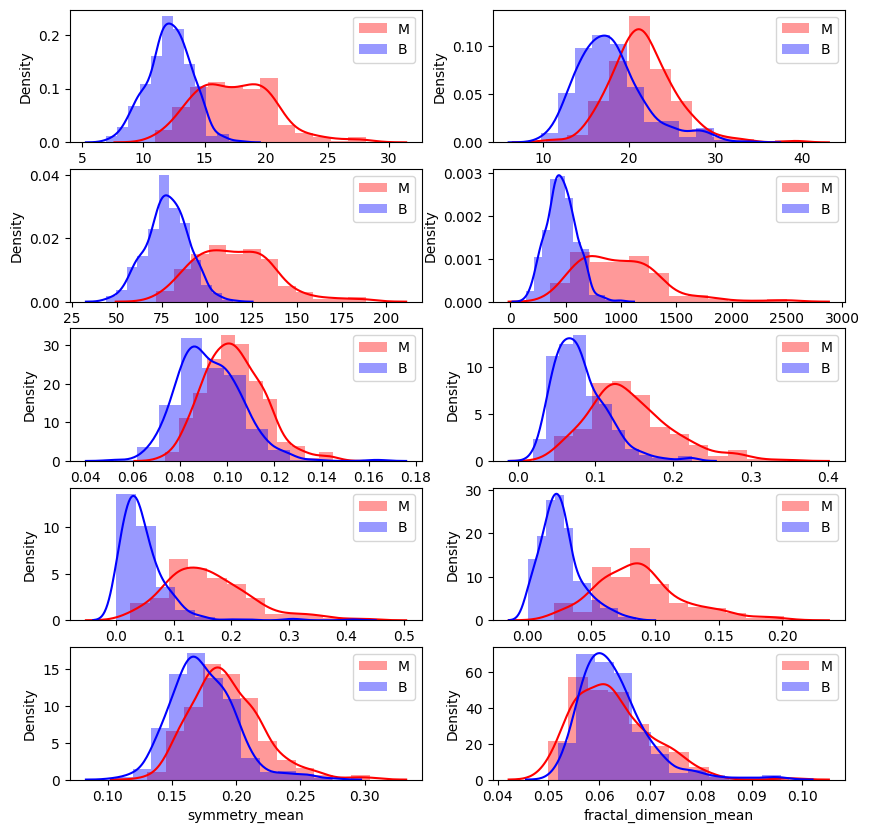

In [20]:
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
for i, feature in enumerate(df.columns[1:]):
  rows = 5
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')

plt.show()

In [32]:
data = pd.read_csv(filepath, header = 0)
data = data.set_index('id')
x = data.loc[:, data.columns[1:]]
y = data.loc[:, 'diagnosis']
logic = lambda val: 1 if val=='M' else 0
y = y.map(logic)
y.head()

,diagnosis
id,
842302,1
842517,1
84300903,1
84348301,1
84358402,1


In [33]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# many ways of selecting columns

#EDA -> 3 graphs -> correlation, scatter of data, distribution plot
#    -> derive new columns -> FEATURE IMPORTANCE-> PCA, LDA
#.   -> permuation based -> create permuations of all COLUMNS and then figure out which
#       impacted the outcome the most
#        (radius), (texture), (fd), (rd, fd), (tex, r), (tex...)/.......


In [36]:
# prompt: generate all combinations for df.columns

import itertools

def generate_combinations(columns):
  """Generates all possible combinations of columns.

  Args:
    columns: A list of column names.

  Returns:
    A list of tuples, where each tuple represents a combination of columns.
  """
  all_combinations = []
  for i in range(1, len(columns) + 1):
    for combination in itertools.combinations(columns, i):
      all_combinations.append(combination)
  return all_combinations

# Example usage with the provided df.columns
combinations = generate_combinations(df.columns[1:])
len(combinations)


1023

In [37]:
combinations[:5]

[('radius_mean',),
 ('texture_mean',),
 ('perimeter_mean',),
 ('area_mean',),
 ('smoothness_mean',)]

In [38]:
combinations[-5:]

[('radius_mean',
  'texture_mean',
  'perimeter_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean'),
 ('radius_mean',
  'texture_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean'),
 ('radius_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean'),
 ('texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean'),
 ('radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean')]

In [45]:
max_acc = 0
best_model_columns = None
best_model = None

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

for combination in combinations:
  xtemp_train = xtrain.loc[:, combination]
  xtemp_test = xtest.loc[:, combination]
  model = DecisionTreeClassifier()
  model.fit(xtemp_train, ytrain)
  p = model.predict(xtemp_test)
  performance = accuracy_score(p, ytest)
  print(combination,' : ' ,performance)
  if performance > max_acc:
    max_acc = performance
    best_model_columns = combination
    best_model = model

('radius_mean',)  :  0.8771929824561403
('texture_mean',)  :  0.6578947368421053
('perimeter_mean',)  :  0.8157894736842105
('area_mean',)  :  0.8157894736842105
('smoothness_mean',)  :  0.5964912280701754
('compactness_mean',)  :  0.7192982456140351
('concavity_mean',)  :  0.8245614035087719
('concave points_mean',)  :  0.8245614035087719
('symmetry_mean',)  :  0.6403508771929824
('fractal_dimension_mean',)  :  0.5701754385964912
('radius_mean', 'texture_mean')  :  0.868421052631579
('radius_mean', 'perimeter_mean')  :  0.8947368421052632
('radius_mean', 'area_mean')  :  0.8421052631578947
('radius_mean', 'smoothness_mean')  :  0.8596491228070176
('radius_mean', 'compactness_mean')  :  0.8596491228070176
('radius_mean', 'concavity_mean')  :  0.9298245614035088
('radius_mean', 'concave points_mean')  :  0.9035087719298246
('radius_mean', 'symmetry_mean')  :  0.8596491228070176
('radius_mean', 'fractal_dimension_mean')  :  0.8245614035087719
('texture_mean', 'perimeter_mean')  :  0.8684

In [46]:
max_acc

0.9649122807017544

In [47]:
best_model_columns

('texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean')

In [50]:
print(dir(best_model))

['_BaseDecisionTree__metadata_request__predict', '_DecisionTreeClassifier__metadata_request__fit', '_DecisionTreeClassifier__metadata_request__predict_proba', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_missing_values_in_feature_mask', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_fit', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_prune